Ilinca Bianca Mitrea Mitrea 100495772

David Mancebo Barrena 100495917

# 1.EDA

## Número de variables e instancias

In [17]:
import pandas as pd
df = pd.read_csv("attrition_availabledata_08.csv")
print("Número de instancias:", df.shape[0])
print("Número de variables:", df.shape[1])


Número de instancias: 2940
Número de variables: 31


## Tipo de variables


Para identificar el tipo de cada variable en el dataset vamos a utilizar funciones de pandas.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2923 non-null   float64
 5   JobSatisfaction          2928 non-null   float64
 6   WorkLifeBalance          2916 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  Gender                   2940 non-null   object 
 14  JobLevel                

In [21]:

# Seleccionar variables numéricas
numeric_vars = df.select_dtypes(include=['number'])
print("Variables numéricas:", numeric_vars.columns)
print("Número de variables numéricas:", len(numeric_vars.columns))

# Seleccionar variables categóricas
categorical_vars = df.select_dtypes(include=['object'])
print("Variables numéricas:", categorical_vars.columns)
print("Número de variables categóricas:", len(categorical_vars.columns))

Variables numéricas: Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Número de variables numéricas: 20
Variables numéricas: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Attrition'],
      dtype='object')
Número de variables categóricas: 7




De las 8 variables categóricas, se puede observar que una de ellas es ordinal. Por lo que:
Número de variables numéricas: 23

Número de variables categóricas: 8

Variables ordinales: BusinessTravel.

## Cardinalidad de las variables categóricas

In [22]:
cardinality = categorical_vars.nunique().sort_values(ascending=False)
print("Cardinalidad de cada variable categórica:")
print(cardinality)

Cardinalidad de cada variable categórica:
JobRole           9
EducationField    6
BusinessTravel    3
Department        3
MaritalStatus     3
Gender            2
Attrition         2
dtype: int64


Observamos que las variables con mayor cardinalidad son JobRole, con una cardinalidad de 9, y EducationField, con una cardinalidad de 6.


## Valores faltantes

Vamos a contar los valores faltantes.

In [12]:
# Contar valores faltantes en cada columna
missing_values = df.isnull().sum()

# Filtrar solo las variables que tienen valores faltantes
missing_values = missing_values[missing_values > 0]

# Mostrar el resultado
print("Variables con valores faltantes y su cantidad:")
print(missing_values)

# Calcular el porcentaje de valores faltantes
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filtrar solo las columnas que tienen valores faltantes
missing_percentage = missing_percentage[missing_percentage > 0]

print("\nPorcentaje de valores faltantes por variable:")
print(missing_percentage.sort_values(ascending=False))


Variables con valores faltantes y su cantidad:
EnvironmentSatisfaction    17
JobSatisfaction            12
WorkLifeBalance            24
NumCompaniesWorked         11
TotalWorkingYears           4
dtype: int64

Porcentaje de valores faltantes por variable:
WorkLifeBalance            0.816327
EnvironmentSatisfaction    0.578231
JobSatisfaction            0.408163
NumCompaniesWorked         0.374150
TotalWorkingYears          0.136054
dtype: float64


Observamos que el porcentaje de valores faltantes es bajo, por lo que podríamos simplemente eliminarlos o usar imputación básica.

## Columnas constantes e identificadores

In [15]:
# Contar valores únicos por columna
constant_cols = df.nunique()[df.nunique() == 1]

print("Columnas constantes:")
print(constant_cols)

# Contar valores únicos en cada columna y compararlos con el número de filas
id_cols = df.nunique()[df.nunique() == df.shape[0]]

print("\nColumnas de ID:")
print(id_cols)


Columnas constantes:
EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64

Columnas de ID:
EmployeeID    2940
dtype: int64

Dataset después de eliminar columnas constantes e ID: (2940, 27)


## Tipo de problema

En este caso, la variable Attrition indica si un empleado renuncia, por lo que es un problema de clasificación.

## Desbalanceo de datos


In [23]:
# Contar las instancias por cada clase
conteo = df['Attrition'].value_counts()
print("Conteo por clase:")
print(conteo)

# Calcular el porcentaje de cada clase
porcentajes = df['Attrition'].value_counts(normalize=True) * 100
print("\nPorcentaje por clase:")
print(porcentajes)

Conteo por clase:
Attrition
No     2466
Yes     474
Name: count, dtype: int64

Porcentaje por clase:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


También podemos visualizar la distribución con un gráfico de barras

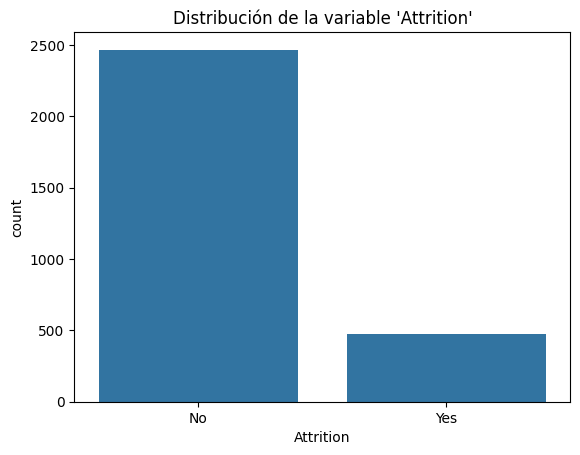

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=df)
plt.title("Distribución de la variable 'Attrition'")
plt.show()


Sí, el dataset está desbalanceado porque la clase mayoritaria ("No" - empleados que no abandonan la empresa) representa el 83.88% de los datos, mientras que la clase minoritaria ("Yes" - empleados que abandonan la empresa) solo representa el 16.12%.
Podríamos usar SMOTE para aumentar la clase minoritaria (oversampling)


# 2. Preproceso de datos

Según las diapositivas de clase el preproceso tiene las siguientes fases en general:

Instancias:
1. Quitar datos ruidosos (Wilson editing rule) (sobre todo para KNN)
2. Quitar datos redundantes (Condensación, sobre todo para KNN)
3. Re-balanceo en problemas de clase desbalanceada: oversampling,
undersampling, SMOTE – Synthetic Minority Over-sampling Technique, …

Atributos:
1. Escalado/Normalización (MinMax, Standard, Robust)
2. Quitar atributos constantes
3. Imputación (¿qué hacer con valores faltantes (missing values))?
4. Codificación de atributos categóricos (one-hot-encoding/dummy variables,
codificación ordinal, alta cardinalidad, …)
5. Selección de atributos
6. Transformación de atributos (PCA, ...) "

## Eliminación de atributos constantes

In [25]:
# Detectar columnas constantes
constant_cols = [col for col in df.columns if df[col].nunique() == 1]

# Eliminar columnas constantes
df = df.drop(columns=constant_cols)

print("Columnas constantes eliminadas:", constant_cols)

Columnas constantes eliminadas: []


## Eliminación de identificadores

In [29]:
# Detectar columnas de identificación (cardinalidad igual al número de filas)
id_cols = [col for col in df.columns if df[col].nunique() == df.shape[0]]

# Eliminar columnas de ID
df = df.drop(columns=id_cols)

print("Columnas de identificación eliminadas:", id_cols)


Columnas de identificación eliminadas: []


In [28]:
print("\nDataset después de eliminar columnas constantes e ID:")
print("Número de instancias:", df.shape[0])
print("Número de variables:", df.shape[1])


Dataset después de eliminar columnas constantes e ID:
Número de instancias: 2940
Número de variables: 27


## Imputación de valores faltantes

In [31]:
# Separar variables numéricas y categóricas
numeric_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(include=['object'])

# Contar cuántas variables tienen valores faltantes (cantidad y porcentaje)
num_missing = numeric_cols.isnull().sum()
cat_missing = categorical_cols.isnull().sum()

# Calcular el porcentaje de valores faltantes
num_missing_percent = (num_missing / len(df)) * 100
cat_missing_percent = (cat_missing / len(df)) * 100

# Filtrar solo las variables que tienen valores faltantes
num_missing = num_missing[num_missing > 0]
num_missing_percent = num_missing_percent[num_missing.index]

cat_missing = cat_missing[cat_missing > 0]
cat_missing_percent = cat_missing_percent[cat_missing.index]

print(f"Número de variables numéricas con valores faltantes: {len(num_missing)}")
print(pd.DataFrame({'Valores Faltantes': num_missing, 'Porcentaje': num_missing_percent.round(2)}))

print(f"\nNúmero de variables categóricas con valores faltantes: {len(cat_missing)}")
print(pd.DataFrame({'Valores Faltantes': cat_missing, 'Porcentaje': cat_missing_percent.round(2)}))



Número de variables numéricas con valores faltantes: 5
                         Valores Faltantes  Porcentaje
EnvironmentSatisfaction                 17        0.58
JobSatisfaction                         12        0.41
WorkLifeBalance                         24        0.82
NumCompaniesWorked                      11        0.37
TotalWorkingYears                        4        0.14

Número de variables categóricas con valores faltantes: 0
Empty DataFrame
Columns: [Valores Faltantes, Porcentaje]
Index: []


Tenemos valores faltantes solo en variables categóricas. Además,con porcentajes muy bajos (menos de 1% en cada una), por lo que el problema es leve. Dado que los porcentajes son bajos, podríamos imputar estos valores faltantes. Con el fin de evitar sesgos de outliers y, sobre todo, porque necesitamos valores discretos, vamos a imputar con la mediana.

In [32]:
from sklearn.impute import SimpleImputer

# Lista de variables numéricas con valores faltantes
numeric_missing_vars = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 
                        'NumCompaniesWorked', 'TotalWorkingYears']

# imputador con mediana
imputer = SimpleImputer(strategy='median')

# Aplicar imputación a las variables numéricas con valores faltantes
df[numeric_missing_vars] = imputer.fit_transform(df[numeric_missing_vars])

# Verificar si quedan valores faltantes después de la imputación
print(df[numeric_missing_vars].isnull().sum())

EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
NumCompaniesWorked         0
TotalWorkingYears          0
dtype: int64


## Encoding

In [33]:
# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
print("Variables categóricas:", categorical_cols)

Variables categóricas: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Attrition'],
      dtype='object')


Vamos a identificar las variables ordinales dentro de las variables categóricas para determinar qué tipo de encoding haremos para cada una.

In [34]:
# Mostrar valores únicos por cada variable categórica
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].unique())



BusinessTravel:
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']

Department:
['Research & Development' 'Sales' 'Human Resources']

EducationField:
['Other' 'Marketing' 'Life Sciences' 'Technical Degree' 'Medical'
 'Human Resources']

Gender:
['Female' 'Male']

JobRole:
['Research Scientist' 'Manufacturing Director' 'Healthcare Representative'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Sales Representative' 'Human Resources']

MaritalStatus:
['Divorced' 'Married' 'Single']

Attrition:
['No' 'Yes']


Vemos que todas son categóricas, excepto BusinessTravel que es ordinal porque tiene un orden implícito. Attrition y gender pueden tratarse como variables binarias.

Para variables ordinales: usamos Label Encoding

Para variables nominales: usamos One-Hot Encoding

Para variables binarias: convertimos a 0 y 1


In [35]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding para variables nominales
df = pd.get_dummies(df, columns=['Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)

# Label Encoding para variables ordinales
ordinal_cols = ['BusinessTravel']
le = LabelEncoder()
for col in ordinal_cols:
    df[col] = le.fit_transform(df[col])

# Convertir variable binaria Attrition
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Convertir Gender en binario
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


        hrs  absences  JobInvolvement  PerformanceRating  \
0  6.356785        10               2                  3   
1  5.675418        16               2                  3   
2  8.936332         7               2                  3   
3  7.348949        15               2                  3   
4  7.044108        21               3                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age  \
0                      3.0              1.0              3.0   32   
1                      4.0              3.0              3.0   25   
2                      3.0              4.0              3.0   46   
3                      2.0              3.0              3.0   34   
4                      2.0              4.0              2.0   30   

   BusinessTravel  DistanceFromHome  ...  JobRole_Human Resources  \
0               0                11  ...                    False   
1               1                 5  ...                    False   
2               2

In [36]:
# Verificar encoding
print(df.head()) 
print(df.shape)   

print("Columnas después del One-Hot Encoding:")
print([col for col in df.columns if 'Department' in col or 'EducationField' in col or 'JobRole' in col or 'MaritalStatus' in col])


        hrs  absences  JobInvolvement  PerformanceRating  \
0  6.356785        10               2                  3   
1  5.675418        16               2                  3   
2  8.936332         7               2                  3   
3  7.348949        15               2                  3   
4  7.044108        21               3                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age  \
0                      3.0              1.0              3.0   32   
1                      4.0              3.0              3.0   25   
2                      3.0              4.0              3.0   46   
3                      2.0              3.0              3.0   34   
4                      2.0              4.0              2.0   30   

   BusinessTravel  DistanceFromHome  ...  JobRole_Human Resources  \
0               0                11  ...                    False   
1               1                 5  ...                    False   
2               2

In [38]:
print("\nValores únicos en BusinessTravel después de Label Encoding:")
print(df['BusinessTravel'].unique())



Valores únicos en BusinessTravel después de Label Encoding:
[0 1 2]


In [37]:
print("\nDistribución de Attrition después de la conversión a 0/1:")
print(df['Attrition'].value_counts())

print("\nDistribución de Gender después de la conversión a 0/1:")
print(df['Gender'].value_counts())



Distribución de Attrition después de la conversión a 0/1:
Attrition
0    2466
1     474
Name: count, dtype: int64

Distribución de Gender después de la conversión a 0/1:
Gender
0    1777
1    1163
Name: count, dtype: int64





continuará... :)